# Training procedure

## Preparing the model

In [1]:
from utils.corpus import Corpus

corpus = Corpus(registry_path = 'utils/article_registry.json')

In [2]:
import tomotopy as tp

In [11]:
corpus.get_time_slices(10)

1950 - 1959: 38
1960 - 1969: 31
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 144
2010 - 2019: 341
2020 - 2029: 66


[38, 31, 53, 94, 108, 144, 341, 66]

In [15]:
bins = [1979, 1989, 1999, 2009, 2019, 2029]

In [24]:
model = tp.DTModel(t=len(bins), k=20, seed=110822, min_df=5, min_cf=5, rm_top=5)

timepoint = 0
for doc in corpus.documents:
    year = int(doc.date[:4])

    if year > bins[timepoint]:
        timepoint += 1

    model.add_doc(words=doc.get_bow_list(), timepoint=timepoint)

In [23]:
model = tp.LDAModel(k=20, min_df=5, min_cf=5, rm_top=5)

for doc in corpus.documents:
    model.add_doc(words=doc.get_bow_list())

In [26]:
prev_perplexity = model.perplexity * 1.5

while prev_perplexity / model.perplexity > 1:
    prev_perplexity = model.perplexity
    model.train(20)
    print(f"Perplexity: {model.perplexity}; Ratio: {(prev_perplexity / model.perplexity)}")
    

/tmp/ipykernel_59693/1095967709.py:5: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(20)


Perplexity: 123649.446998733; Ratio: 1.6391139314096286
Perplexity: 36292.91094310501; Ratio: 3.4069862071018067
Perplexity: 15949.93365161084; Ratio: 2.2754270792493023
Perplexity: 9208.747913007624; Ratio: 1.7320415112114314
Perplexity: 6840.231475215241; Ratio: 1.3462626149969368
Perplexity: 5632.543026760965; Ratio: 1.2144126450018022
Perplexity: 5060.651612767908; Ratio: 1.1130074657876445
Perplexity: 4781.737023898301; Ratio: 1.0583291359344187
Perplexity: 4626.850616294113; Ratio: 1.0334755583114643
Perplexity: 4520.661893816228; Ratio: 1.023489640449143
Perplexity: 4443.82114097887; Ratio: 1.017291594418319
Perplexity: 4392.891622741972; Ratio: 1.0115936204693137
Perplexity: 4348.002060134654; Ratio: 1.0103241815405046
Perplexity: 4313.028310457598; Ratio: 1.0081088616071119
Perplexity: 4281.935004380944; Ratio: 1.0072615081837633
Perplexity: 4255.049454755769; Ratio: 1.006318504616938
Perplexity: 4230.460681990496; Ratio: 1.0058123156350207
Perplexity: 4209.693387568954; Ratio

In [27]:
model.summary(topic_word_top_n=10)

<Basic Info>
| DTModel (current version: 0.12.3)
| 875 docs, 2732743 words
| Total Vocabs: 138192, Used Vocabs: 22855
| Entropy of words: 8.37764
| Entropy of term-weighted words: 8.37764
| Removed Vocabs: mundo filosofía forma relación objeto
|
<Training Info>
| Iterations: 840, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.29541
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 5 (minimum collection frequency of words)
| min_df: 5 (minimum document frequency of words)
| rm_top: 5 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| t: 6 (the number of timpoints)
| alpha_var: 0.1 (transition variance of alpha (per-document topic distribution))
| eta_var: 0.1 (variance of eta (topic distribution of each document) from its alpha )
| phi_var: 0.1 (transition variance of phi (word distribution of each topic))
| lr_a: 0.01 (shape parameter `a` greater than zero, for SGLD step size calculated as `e_i = a * (b + i) ^ (-c)

In [102]:
with open('test.txt', 'w') as fp:
    model.summary(topic_word_top_n=10, file=fp)

In [2]:
from utils.model import Model

## Running the model

In [3]:
#model.train()

# Run a grid search

In [4]:
import json

In [5]:
def gridsearch(min_topics: int, max_topics: int, step: int = 10, iterations: int = 3) -> None:
    with open('gridsearch.json') as file:
        experiment = json.load(file)

    for num_topics in range(min_topics, max_topics, step):
        print(f"Running experiment for {num_topics} topics")
        if str(num_topics) not in experiment:
            experiment[str(num_topics)] = []

        for _ in range(iterations):
            if len(experiment[str(num_topics)]) >= iterations:
                print(f"We've already got all iterations for {num_topics} topics. Continuing...")
                break
            
            model = Model(corpus, num_topics=num_topics, time_window=10)
            experiment[str(num_topics)].append(model.get_stats())

            with open('gridsearch.json', 'w') as file:
                json.dump(experiment, file)

In [16]:
gridsearch(min_topics = 50, max_topics = 150)

Running experiment for 50 topics
1950 - 1959: 38
1960 - 1969: 32
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 146
2010 - 2019: 342
2020 - 2029: 66
Timing training...
Model trained! Loading topics...
Getting model coherence...
We've already got all iterations for 50 topics. Continuing...
Running experiment for 60 topics
We've already got all iterations for 60 topics. Continuing...
Running experiment for 70 topics
We've already got all iterations for 70 topics. Continuing...
Running experiment for 80 topics
We've already got all iterations for 80 topics. Continuing...
Running experiment for 90 topics
We've already got all iterations for 90 topics. Continuing...
Running experiment for 100 topics
1950 - 1959: 38
1960 - 1969: 32
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 146
2010 - 2019: 342
2020 - 2029: 66
Timing training...
Model trained! Loading topics...
Getting model coherence...
1950 - 1959: 38
1960 - 1969: 32
1970 - 1979: 53
1980 - 1989: 94
1990 - 

In [43]:
with open('gridsearch.json') as file:
    experiment = json.load(file)

In [44]:
import pandas as pd
import numpy as np

In [45]:
data = []
for n_topics in experiment:
    for results in experiment[n_topics]:
        results['n_topics'] = int(n_topics)
        results['avg_coherence'] = np.mean([c for s, c in results['coherence'].items()])
        data.append(results)

df = pd.DataFrame(data)
df['time_lda_mins'] = df['time_lda'] / 60
df['time_coherence_mins'] = df['time_coherence'] / 60

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='n_topics', ylabel='avg_word_mass'>

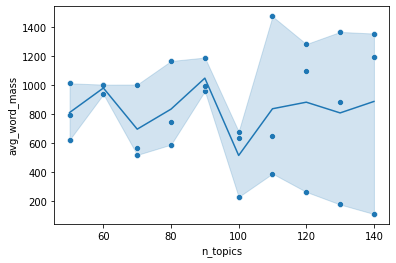

In [47]:
sns.lineplot(data = df, x = 'n_topics', y = 'avg_word_mass')
sns.scatterplot(data = df, x = 'n_topics', y = 'avg_word_mass')

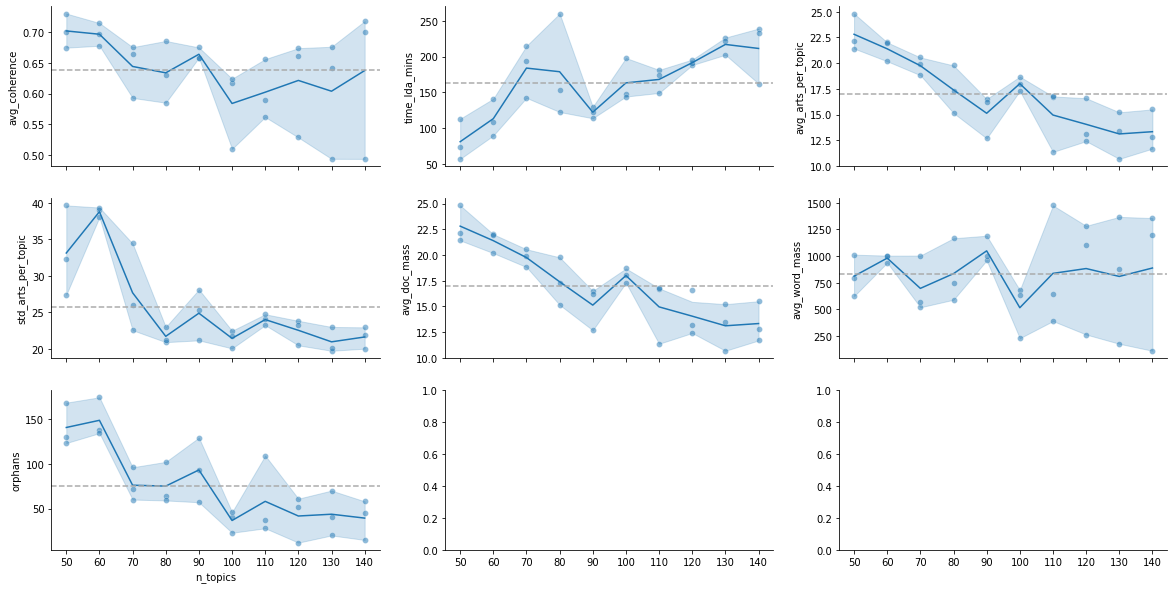

In [49]:
vars = ['avg_coherence', 
        'time_lda_mins', 
        #'empty_topics', 
        'avg_arts_per_topic', 
        'std_arts_per_topic', 
        'avg_doc_mass',
        'avg_word_mass',
        'orphans']

rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, sharex=True)

for ax, var in zip(axs.flatten(), vars):
    sns.lineplot(data=df, x='n_topics', y=var, ax=ax)
    sns.scatterplot(data=df, x='n_topics', y=var, ax=ax, alpha = 0.5)
    ax.axhline(df[var].mean(), linestyle='--', color='#aaa')
    plt.xticks(np.arange(50, 140+1, 10))
    sns.despine()

fig.set_figheight(10)
fig.set_figwidth(20)

# Training a final model

In [5]:
final_model = Model(corpus = corpus, num_topics=60, seed=280722)
final_model.prepare_corpus()
final_model.train()

1950 - 1959: 38
1960 - 1969: 31
1970 - 1979: 53
1980 - 1989: 94
1990 - 1999: 108
2000 - 2009: 144
2010 - 2019: 341
2020 - 2029: 66
Model trained! Loading topics...


In [11]:
coherence = final_model.get_coherence()

In [14]:
[np.mean(coherences) for coherences in coherence.values()]

[0.6296910321511929,
 0.6300002706210549,
 0.6289867459981515,
 0.6273914172941988,
 0.6265772644495335,
 0.625308733368092,
 0.6251112038264599,
 0.6270957394604708]

# Printing a topic report

In [6]:
len(final_model.get_orphans())

157

In [7]:
output = ""
for topic in final_model.topics:
    references = '\n* '.join([doc.get_ref() for doc, prob in topic.docs[:10]])
    top_words = '\n* '.join(topic.top_words())

    output += f"""
# Topic {topic.topic_id}

* Words for 0.5 probability mass: {topic.length}
* Docs for 0.5 "likelihood mass": {len(topic.docs)}

<div style='display: flex; justify-content: space-around'>
<div style='display: block'>
## Top 10 words in topic

* {top_words}
</div>

<div style='display: block'>
## Top 10 references

* {references}
</div>
</div>

## Word evolution

{topic.top_word_evolution_table().to_markdown(index=False)}

## Words in half of probability mass

{topic.word_table.mean(axis=1).round(5).to_markdown()}

</div>
"""

with open(f"results/results.md", "w") as file:
    file.write(output)

## Topic tagging

In [ ]:
# Temp function: Writing a sample json template to tag topics
with open('results/topic_tags.json', 'w') as file:
    json.dump({topic.id: f"Etiqueta {topic.id}" for topic in topics}, file)

In [ ]:
with open('results/topic_tags.json') as file:
    topic_tags = json.load(file)

In [ ]:
for topic in topics:
    topic.tag = topic_tags[str(topic.id)]

In [ ]:
references_data = []
for topic in topics:
    for doc in topic.docs:
        if len(topic.docs) < 5:
            continue
        references_data.append({
            'Topic id': topic.id,
            'Topic tag': topic.tag,
            'Year': doc.date[:4],
            'Slice': (int(doc.date[:4]) - 1950) // 10, # Time window
            'Reference': doc.get_ref(),
            'Prob': doc.main_topic_prob
        })
references_df = pd.DataFrame(references_data)
references_df = references_df.sort_values(['Topic id', 'Slice', 'Year', 'Prob'], ascending=[True, True, True, False]).groupby(['Topic id', 'Slice'])

In [ ]:
references_df.head(10).round(5).set_index(['Topic id', 'Topic tag', 'Slice', 'Year']).to_html('results/articles_table.html')

## Stream graph

In [ ]:
x = np.arange(1950, 2022, 5)

y = []
for topic in topics:
    topic_array = np.zeros(len(x))
    for doc in topic.docs:
        bin = (int(doc.date[:4]) - 1950) // 5
        topic_array[bin] += 1
    y.append(topic_array)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.stackplot(x, [y_ for y_ in y if np.mean(y_) > 1], baseline='sym')

Code copied from [Streamgraph with Python and Matplotlib
](https://www.python-graph-gallery.com/streamchart-basic-matplotlib)

In [ ]:
from scipy import stats

In [ ]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

In [ ]:
pd.DataFrame(y).T.describe().T.sort_values('mean')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 10) for y_ in y if y_.mean() > 1]
_ = ax.stackplot(x, y_smoothed, baseline="weighted_wiggle", labels=[topic.tag for topic in topics])
sns.despine(left=True)
plt.legend()